<a href="https://colab.research.google.com/github/NVishnevskaya/dano_hackaton/blob/main/segment_productive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
from ydata_profiling import ProfileReport
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import sheets

Загрузили датасет - как зарабатывают люди

In [ ]:
earns_df = pd.read_csv("NEW Как зарабатывают бобров КРОК.csv", delimiter = ';')
earns_df

,Код сотрудника,Департамент,Сумма вознаграждения,Название миссии,Контейнер,Дата,Комментарий
0,SU147663,ДБП.группа консультантов по автоматизации бизн...,50.0,Ты вовремя списал затраченное время на задачи ...,Проектный опыт,06.02.2024,За неделю 29.01-04.02
1,SU76490,ДВА.группа автоматизации производственных проц...,50.0,Ты вовремя списал затраченное время на задачи ...,Проектный опыт,24.01.2024,За неделю 15.01-21.01
2,SU69215,ДИРС.группа инженеров по ИТ-инфраструктуре и м...,50.0,Ты вовремя списал затраченное время на задачи ...,Проектный опыт,29.07.2024,За неделю 15.07-21.07
3,SU4528,Служба охраны.группа обеспечения контрольно-пр...,5.0,Ты угадал коллегу в Jive с первого раза,Корпоративная жизнь КРОК,02.05.2024,NaN
4,SU163517,ДРП.отдел кадров,5.0,Ты угадал коллегу в Jive с первого раза,Корпоративная жизнь КРОК,06.09.2024,NaN
...,...,...,...,...,...,...,...
94877,SU190343,ДВА.группа разработки инфраструктурных приложений,5.0,Ты угадал коллегу в Jive с первого раза,Корпоративная жизнь КРОК,11.04.2024,NaN
94878,SU44113,ДВА.группа разработки 1С,50.0,Ты вовремя списал затраченное время на задачи ...,Проектный опыт,02.10.2024,За неделю 16.09 - 22.09
94879,SU173704,ДТК.Цифровое производство.группа инженеров циф...,50.0,Ты вовремя списал затраченное время на задачи ...,Проектный опыт,06.02.2024,За неделю 29.01-04.02
94880,SU43534,"ДРПО.Практика ""Роботехника"".группа разработки ...",200.0,"Плюс один год, как ты в команде КРОК!",Я и КРОК,04.03.2024,NaN


Определяем период с наибольшим количеством измерений

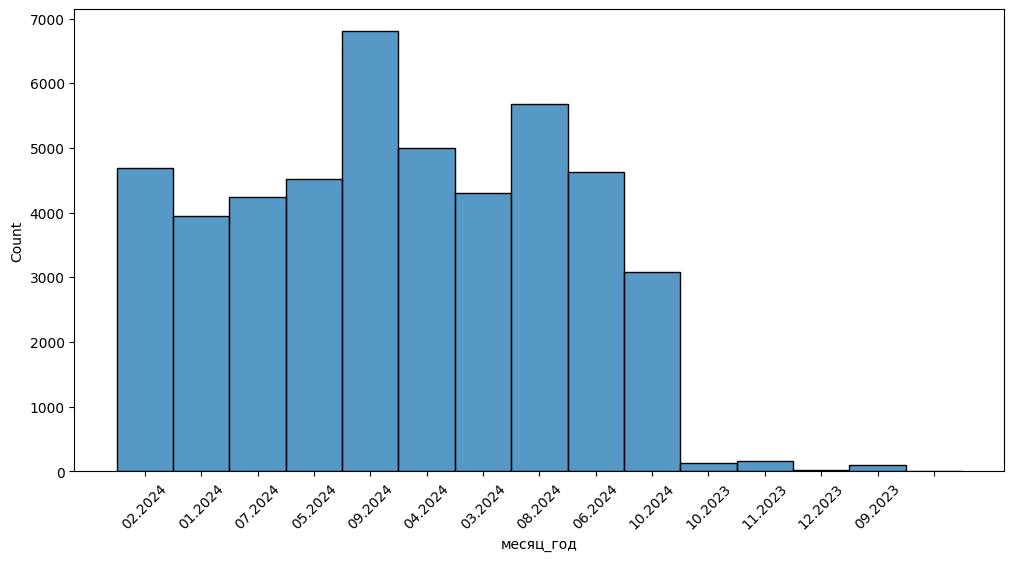

In [ ]:
earns_df["месяц_год"] = earns_df["Дата"].apply(lambda x: str(x)[3:])

plt.figure(figsize=(12, 6))
sns.histplot(earns_df["месяц_год"], binwidth=0.5)  # <- binwidth регулирует ширину столбцов
plt.xticks(rotation=45)
plt.show()

In [85]:
missions_by_container = earns_df.groupby('Контейнер').apply(lambda x: x['Название миссии'].unique(), include_groups=False)
missions_by_container

,0
Контейнер,
Croc Voices,[CROC Voices]
Вклад в ИТ-образование,[Ты помог создать новый образовательный формат...
ДТК Сервис,[Викторина]
Для новых сотрудников,[Ты заполнил(-а) анкету обратной связи после w...
Другое,[Ты забрал свой заказ из Боброшопа в выбранный...
Квест 15-19 июля,"[Квест по Боброшопу 17 июля, Квест по Боброшоп..."
Корпоративная жизнь КРОК,"[Ты угадал коллегу в Jive с первого раза, Ты д..."
Обмен опытом и повышение экспертизы,[Ты оставил качественный отзыв в CROC LMS посл...
Поиск и развитие талантов,"[HiPro, Креативный класс, HiPo, Звезда департа..."


Смотрим, за что выдают вознаграждения в принципе

In [ ]:
# earns_df.sort_values(by='Сумма вознаграждения')
test_df = earns_df[["Сумма вознаграждения", 'Название миссии']].drop_duplicates()
test_df = test_df.sort_values(by='Сумма вознаграждения', ascending=False)
test_df

,Сумма вознаграждения,Название миссии
3948,800.0,Best Hunter (Вакансия месяца)
25,700.0,Креативный класс
398,600.0,Звезда департамента
1713,600.0,Best Hunter
2545,600.0,Трансформация
...,...,...
467,NaN,Продвижение IT-профессий
2641,NaN,Croc Sport (4 уровень)
16763,NaN,Тренер
23532,NaN,Развитие бренда работодателя


Выделили контейнеры, с полезными миссиями

In [ ]:
containers = [
    "Обмен опытом и повышение экспертизы",
    "Поиск и развитие талантов",
    "Ускорение бизнес-процессов"
    ]
dests = earns_df[["Контейнер", "Название миссии", "Сумма вознаграждения"]].drop_duplicates()
req = dests[dests["Контейнер"].isin(containers)]
req

,Контейнер,Название миссии,Сумма вознаграждения
7,Поиск и развитие талантов,HiPro,550.0
18,Ускорение бизнес-процессов,Ты вовремя подписал документы по кадровым движ...,100.0
25,Поиск и развитие талантов,Креативный класс,700.0
47,Обмен опытом и повышение экспертизы,Ты оставил качественный отзыв в CROC LMS после...,20.0
52,Обмен опытом и повышение экспертизы,Ты добавил свой сертификат в LMS после прохож...,100.0
58,Поиск и развитие талантов,HiPo,550.0
67,Обмен опытом и повышение экспертизы,Наставник,500.0
242,Ускорение бизнес-процессов,Ты обновил свои персональные данные,100.0
355,Ускорение бизнес-процессов,Ты вовремя обновил свои персональные данные - ...,150.0
394,Обмен опытом и повышение экспертизы,Ты провел внутреннее обучение,250.0


In [ ]:
req.drop_duplicates().sort_values(by="Сумма вознаграждения", ascending=False)

,Контейнер,Название миссии,Сумма вознаграждения
3948,Поиск и развитие талантов,Best Hunter (Вакансия месяца),800.0
25,Поиск и развитие талантов,Креативный класс,700.0
1713,Поиск и развитие талантов,Best Hunter,600.0
398,Поиск и развитие талантов,Звезда департамента,600.0
58,Поиск и развитие талантов,HiPo,550.0
7,Поиск и развитие талантов,HiPro,550.0
67,Обмен опытом и повышение экспертизы,Наставник,500.0
12873,Обмен опытом и повышение экспертизы,Ты провел цикл внутренних обучений,400.0
37729,Обмен опытом и повышение экспертизы,Победитель Managers' fights,400.0
45893,Обмен опытом и повышение экспертизы,Ты прошел программу адаптации для аналитиков,350.0


In [ ]:
missions = req["Название миссии"]
missions

,Название миссии
7,HiPro
18,Ты вовремя подписал документы по кадровым движ...
25,Креативный класс
47,Ты оставил качественный отзыв в CROC LMS после...
52,Ты добавил свой сертификат в LMS после прохож...
58,HiPo
67,Наставник
242,Ты обновил свои персональные данные
355,Ты вовремя обновил свои персональные данные - ...
394,Ты провел внутреннее обучение


In [ ]:
adding = ["Миссия Best Hunter", "Миссия Креативный класс",
          "Ты помог нам организовать мероприятие для профессионального коммьюнити",
          "Ты вовремя списал затраченное время на задачи и проекты"]
final_list_of_productive = list(missions) + list(adding)

In [ ]:
answer = test_df[test_df["Название миссии"].isin(final_list_of_productive)]
sheets.InteractiveSheet(df=answer)

https://docs.google.com/spreadsheets/d/12TjgzhtWR4sysd4v_heSY5b6k1Dt6brCfS3jL2Qk9mE/edit#gid=0


Итоговый датасет со значениями:
полезная миссия и какое за нее вознаграждение

In [ ]:
answer.to_csv("counted_missions.csv")